In [14]:
import qiskit, sys
import numpy as np
import qtm.qcompilation, qtm.ansatz, qtm.constant
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
print(qtm.constant.noise_prob)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0.04


In [15]:
num_qubits = 5
num_layers = 2
thetas = np.ones(num_layers*num_qubits*2)

compiler = qtm.qcompilation.QuantumCompilation(
    u = qtm.ansatz.create_polygongraph_ansatz,
    vdagger = qtm.state.create_ghz_state(num_qubits).inverse(),
    optimizer = 'qng_fubini_study',
    loss_func = 'loss_fubini_study',
    thetas = thetas,
    num_layers = num_layers
)

compiler.fit(num_steps=100, verbose = 1)
print("Done!")

Step:   0%|          | 0/100 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Step: 100%|██████████| 100/100 [01:59<00:00,  1.19s/it]


Done!


In [16]:
compiler.save(path = './tomography/noise_qng_polygon', text=f'{qtm.constant.noise_prob}', save_all = True)

In [9]:
pwd

'/Users/vutuanhai/Documents/GitHub/UC-VQA/codes'

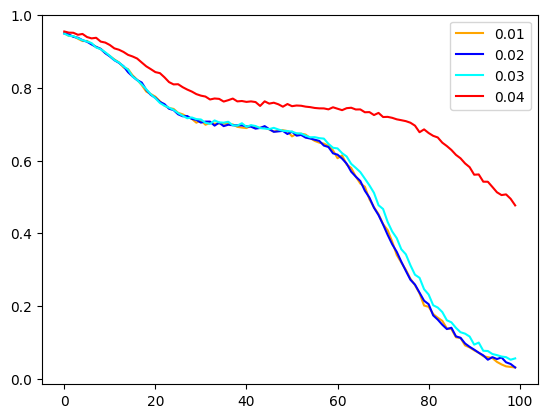

In [17]:
import pandas as pd
noises = [0.01, 0.02, 0.03, 0.04]
color = ["orange", "blue", "cyan", "red"]
i = 0
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    plt.plot(loss, color = color[i], label = noise)
    # loss_mitigating = pd.read_csv("./noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    # plt.plot(loss_mitigating, color = color[i], linestyle = "dotted", label = noise)
    i = i + 1
plt.legend()

In [ ]:
import pandas as pd
noises = [0.01, 0.02, 0.03, 0.04]
color = ["orange", "blue", "cyan", "red"]
i = 0

arr_noise = []
for noise in noises:
    loss = pd.read_csv("./tomography/noise_qng_polygon/loss_values" + str(noise) + ".csv", sep=",", header=None)
    plt.plot(loss, color = color[i], label = noise)
    # loss_mitigating = pd.read_csv("./noise_qng_polygon/loss_values" + str(noise) + "_mitigating.csv", sep=",", header=None)
    # plt.plot(loss_mitigating, color = color[i], linestyle = "dotted", label = noise)
    i = i + 1
plt.legend()